<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Lecture14_Logistic_Regression/DATA601_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sns

# sklearn
# Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import r2_score, mean_absolute_error, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

# Statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf

# TensorFlow
# Install TensorFlow: Uncomment and run once.
#pip install tensorflow 
#pip install tensorflow-gpu
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dense, Activation, Dropout, Normalization

## Supervised Learning: Classification
### Method: Logistic Regression
Logistic Regression is one of the most commonly used for ML methods for predictive analytics and modeling, where the dependent variable is finite or categorical, e.g.
 * either A or B (binary regression) or 
 * a range of finite options A, B, C or D (multinomial regression) <br>

<b> Application Examples </b>
* (Medicine) To predict the likelihood of disease or illness for a given population, which means that preventative care can be put in place. 
* (Businesses) To uncover patterns that lead to higher employee retention or create more profitable products by analyzing buyer behavior. 
* (Banking) Loan default prediction. Credit risk assessment.
* (Sports Betting) Sport result prediction, e.g. team-A wins, team-B wins, draw

### Logistic Function
In its basic form, logistic regression uses a logistic function to model a binary dependent variable. <br>
Consider a model with one predictor, $X$ and one binary (Bernoulli) response variable $Y$, which we denote $p=P(Y=1)$. We assume a linear relationship between the predictor variable and the log-odds (also called logit) of the event that $Y=1$. This linear relationship can be written in the following mathematical form (where $\ell$ is the log-odds, $\beta _{i}$ are parameters of the model):

$$ \ell = \log \bigg( \dfrac{{p}} {1 - p} \bigg) = \beta_{0} + \beta_{1}X  $$

<br>
We can recover the "odds" by exponentiating the log-odds 
$$ p = \dfrac{e^{\beta_{0} + \beta_{1}X}} {1 + e^{\beta_{0} + \beta_{1}X} } $$


The above formula shows that once $\beta _{i}$ are fixed, we can easily compute either the log-odds that $Y=1$ for a given observation, or the probability that $Y=1$ for a given observation. <br>
The main use-case of a logistic model is to be given an observation $X$ and estimate the probability $p$ that $Y=1$.


<br>
Note that the above can be changed for multiple logisitic regression for the linear compination of independent variables $\beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \dotso + \beta_{k}X_{k } $ <br>



 

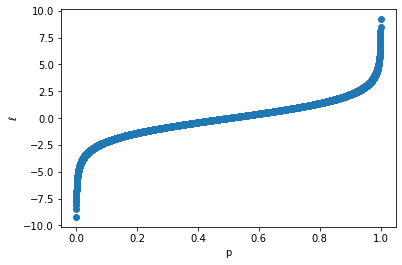

In [2]:
# let's look at these \ell and p functions
p_x = np.arange(0.0001,0.999999999,0.0001)
r_y = [np.log(i/(1-i)) for i in p_x]
plt.scatter(p_x,r_y)
plt.xlabel('p');
plt.ylabel('$\ell$');

You can see that this function goes to to -inf and inf as we get close to 0 and 1, respectively. <br>
<br>
Visualizing the inverse logit:
$$ logit^{-1}(a) = \dfrac{e^{a} } {1 + e^{a}}  $$
where $a = \beta_{0} + \beta_{1}X$

Text(0, 0.5, 'p')

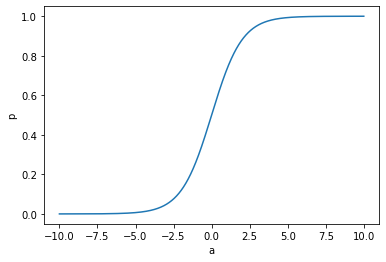

In [3]:
# We can rearrange and invert the axes.
x = np.arange(-10,10,0.001)
y = [np.exp(i)/(1+np.exp(i)) for i in x]
plt.plot(x,y)
plt.xlabel('a')
plt.ylabel('p')

## A Simple Example
* Lets say we are an individual applying for a loan in an Icelandic bank and want to know the probability of our creditscore getting us a loan at the bank. 
* We have our individual credit scores and their categorical binary value.
* Data for each applicant:
  * x-axis: Icelandic credit score points ranging 100(bad credit score) to 400(excellent)
  * y-axis: Approved as 1 or 0

In [4]:
# Read the data in the link.
df = pd.read_csv("https://raw.githubusercontent.com/fgonzaleumbc/Data601_fall2022/main/Datasets/loans.csv")
df.tail()

,accepted,creditscore,amount,age,marital,health_ins,creditgrade
14995,1,101,990461,37,1,1,E
14996,1,139,10543269,52,1,1,E
14997,1,185,9827416,77,1,1,E
14998,1,235,2279692,35,0,1,E
14999,1,192,2814084,22,1,1,E


In [5]:
df.describe()

,accepted,creditscore,amount,age,marital,health_ins
count,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,0.518600,287.329133,3.346065e+07,58.807333,0.490200,0.444467
std,0.499671,74.096185,2.887226e+07,20.860748,0.499921,0.496923
min,0.000000,100.000000,5.005890e+05,18.000000,0.000000,0.000000
25%,0.000000,246.000000,8.865364e+06,42.000000,0.000000,0.000000
50%,1.000000,299.000000,2.314822e+07,62.000000,0.000000,0.000000
75%,1.000000,345.000000,5.608367e+07,76.000000,1.000000,1.000000
max,1.000000,400.000000,9.999737e+07,90.000000,1.000000,1.000000


In [6]:
print(df.accepted.value_counts())
# Note that the dataset is pretty balanced almost 50/50.
# There may be cases that the data is imbalanced and you will have to address such deficiency.
# There are various methods for addressing data imbalance.

1    7779
0    7221
Name: accepted, dtype: int64


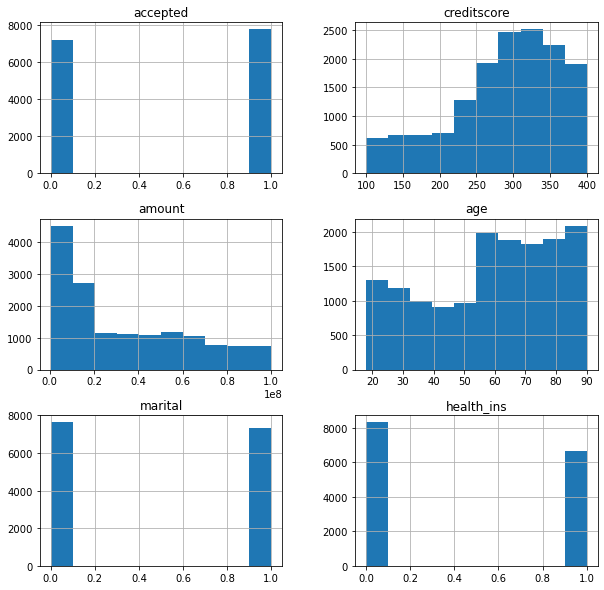

In [7]:
df.hist(layout=(3,2), figsize=(10,10))
plt.show()

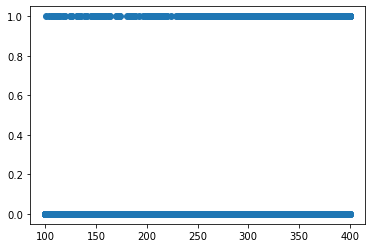

In [8]:
# We can plot the Accepte vs Creditscore values.
x = df.creditscore.values
y = df.accepted.values

plt.scatter(x,y);

The figure above is a little bit misleading and scary!!
Let's plot creditscore histograms for approved and non-approved separately.

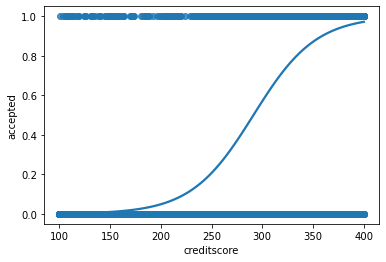

In [9]:
# Plot of the data with a logistic regression.
x = df['creditscore']
y = df['accepted']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)
plt.show();
# In the logistic regression when the values of credit score  an accepted of 0.5 an have
# In this case the creditscore is not the only feature that can be used to determine loan acceptance.

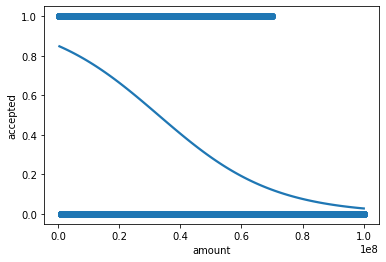

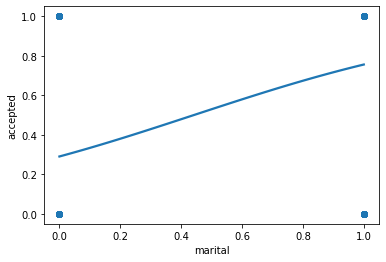

In [10]:
# We can also explore how the data looks with other features.
x = df['amount']
y = df['accepted']
# As expected the lower the amount the larger the probability of getting accepted.

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)
plt.show();

x = df['marital']
y = df['accepted']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)
plt.show();

# It is unfeasable in many cases to go feature by feature.
# In this case logic will tell us that credit score may be one of the leading features in determining acceptance.
# Let's continue to explore.

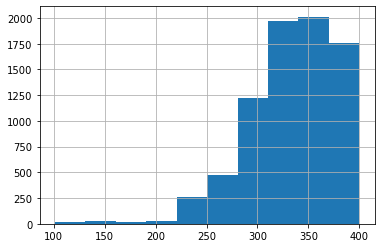

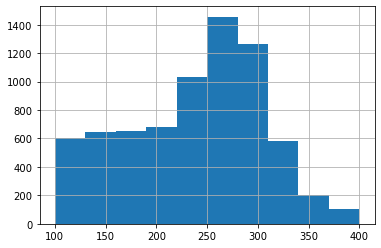

In [11]:
df.loc[df.accepted==1,'creditscore'].hist()
plt.show()
df.loc[df.accepted==0,'creditscore'].hist()
plt.show()
# This figures make a little more sense.

It loooks like credit score ~300 is the boundary for most approvals/denials.

In [12]:
# Let's only use creditscore to predict accepted.
df = df.loc[:,('accepted','creditscore')]

# Lets define our independent and dependent variables, x and y.
x = df.creditscore.values
y = df.accepted.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# As previously mentioned we could aslo do a manual test/train split but using the function is better practice.

In [14]:
# Note that the outputs of train_test_split is an array.
X_train

array([265, 292, 302, ..., 317, 334, 287], dtype=int64)

In [15]:
X_train.reshape(-1,1)
# Input to the fit function requires the form as follows.

array([[265],
       [292],
       [302],
       ...,
       [317],
       [334],
       [287]], dtype=int64)

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train.reshape(-1,1), y_train)

LogisticRegression()

In [17]:
y_predict = logreg.predict(X_test.reshape(-1,1))
y_predict
# y_predict

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [18]:
logreg.score(X_test.reshape(-1,1) , y_test)
# This accuracy score means that 80% of the prediction matched the test data labeling.

0.8066666666666666

## Confusion Matrix
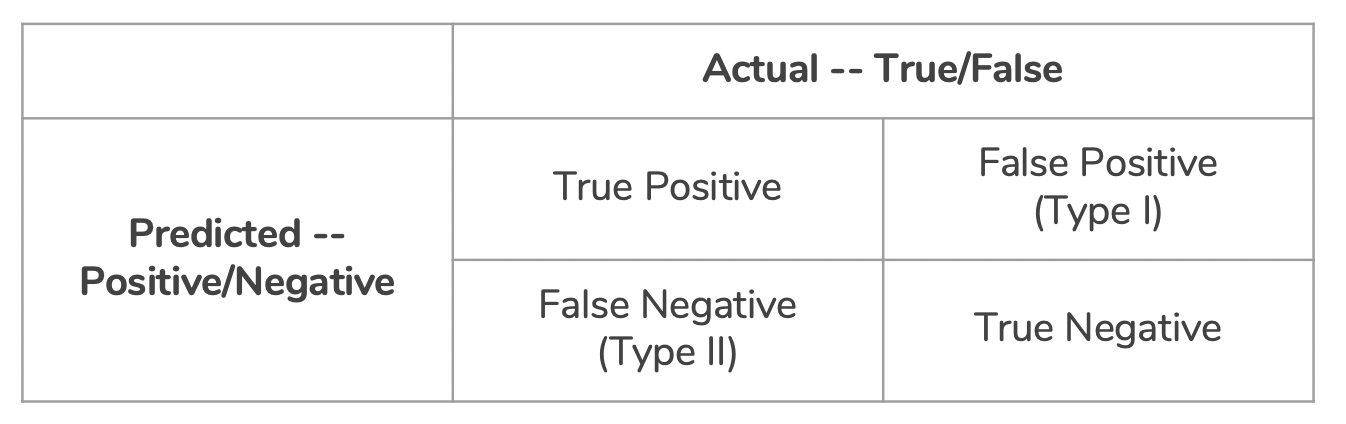

From our confusion matrix, we can calculate five different metrics measuring the validity of our model. <br>
1. Accuracy (all correct / all) = (TP + TN) / (TP + TN + FP + FN)
2. Misclassification (all incorrect / all) = 1 - Accuracy 
3. Precision (true positives / predicted positives) = TP / (TP + FP)
4. Sensitivity aka Recall (true positives / all actual positives) = TP / (TP + FN)
5. Specificity (true negatives / all actual negatives) =TN / (TN + FP)

* Sensitivity and Specificity are extremely crucial for health DS. <br>
  * <b>Sensitivity</b>: how often a test correctly generates a positive result for people who have the condition that’s being tested for. 
  * <b>Specificity</b>: how often a test correctly generates a <b>negative</b> result for people who <b>doesn't</b> have the condition that’s being tested for. <br>
<br>

* <b>Recall</b> measures the ability of a model to find all the relevant cases within a data set. For example <br>

$$ \frac{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam}}{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam} \ + {\mathrm{Spam \ emails \ incorrectly \ labeled \ as \ not \ spam}}} $$ 

<br>

* <b>Precision</b> expresses the proportion of the data points our model says existed in the relevant class that were indeed relevant. <br>

$$ \frac{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam}}{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam} \ + {\mathrm{Normal \ emails \ incorrectly \ labeled \ spam}}} $$ 
<br>

### F1 Score
In some situations, we might know we want to maximize either recall or precision at the expense of the other metric. For example, in preliminary disease screening of patients for follow-up examinations, we would probably want a recall near 1.0—we want to find all patients who actually have the disease—and we can accept a low precision - we accidentally find some patients have the disease who actually don’t have it - if the cost of the follow-up examination isn’t high. However, in cases where we want to find an optimal blend of precision and recall, we can combine the two metrics using the F1 score.


* The <b>F1 score</b> is the harmonic mean of precision and recall, taking both metrics into account in the following equation:

$$ F_1 = 2 \times \frac{\mathrm{precision}\times \mathrm{recall}}{\mathrm{precision}+\mathrm{recall}} $$

 ### ROC Curve
ROC = Receiver Operating Characteristic. <br>
* ROC is one of the most fundamental visualization techniques for showing the performance of a classification model.
* ROC shows how the recall vs. precision relationship changes <b>as we vary the threshold</b> for identifying a positive data point in our model.
* The threshold represents the value above which we consider a data point in the positive class. 

A typical ROC curve looks like this: 

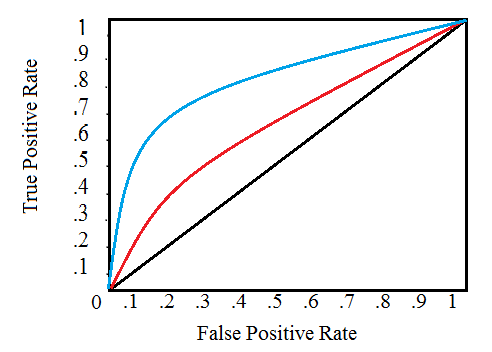

* We can quantify a model’s ROC curve by calculating the total Area Under the Curve (AUC), a metric that falls between zero and one with a higher number indicating better classification performance. 
* In the graph above, the AUC for the blue curve will be greater than that for the red curve, meaning the blue model is better at achieving a blend of precision and recall. 
* A random classifier (the black line) achieves an AUC of 0.5.

In [19]:
y_predict # Prediction of test data.

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [20]:
unique, counts = np.unique(y_predict, return_counts=True)
print(unique)
print(counts)

[0 1]
[1375 1625]


In [21]:
y_test # Test data label.

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
unique, counts = np.unique(y_test, return_counts=True)
print(unique)
print(counts)

[0 1]
[1431 1569]


In [23]:
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
cm1[:,0].sum() # Adds first column of the confusion_matrix array.

Confusion Matrix : 
 [[1113  318]
 [ 262 1307]]


1375

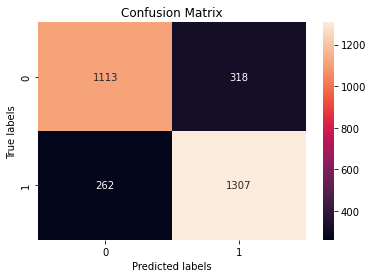

In [24]:
ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

<AxesSubplot:>

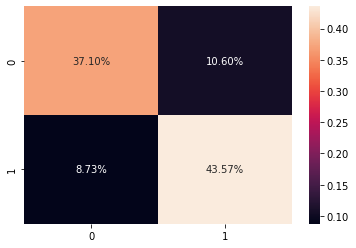

In [25]:
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%') # Confusion matrix as a percentage.

<AxesSubplot:>

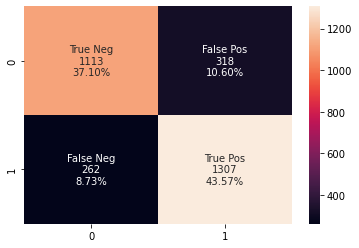

In [26]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm1.flatten()/np.sum(cm1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='')

In [27]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.8066666666666666
Sensitivity :  0.7777777777777778
Specificity :  0.8330146590184832


In [28]:
print(logreg.coef_, logreg.intercept_) # Coefficient and intercept of the logreg model.

[[0.03229255]] [-9.40314326]


From our output we get a positive coefficient slope for the credit score. <br>

That means that the probability of getting a loan increases as we get a higher credit score.<br>

If we have P>|z| value of 0.000 which is higher then 0.001 and then that indipendent variable is significant.

Now we can put the coefficients into the estimated regression equation

In [29]:
test_x = np.array([230])
logreg.predict(test_x.reshape(-1, 1))

array([0], dtype=int64)

In [30]:
a = logreg.intercept_ + test_x*logreg.coef_
p = np.exp(a)/(1 + np.exp(a))
print(p)

[[0.12176125]]


Someone with a credit score of [230] has an estimated probabilty of 12.16 % to get a loan.

In [31]:
test_x = np.array([370])
logreg.predict(test_x.reshape(-1, 1))

array([1], dtype=int64)

In [32]:
a = logreg.intercept_ + test_x*logreg.coef_
p = np.exp(a)/(1 + np.exp(a))
print(p)

[[0.9272437]]


Someone with a credit score of 370 has an estimated probabilty of 92.72 % to get a loan.

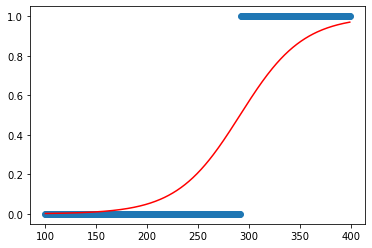

In [33]:
test_x = np.arange(100,400)
test_y = logreg.predict(test_x.reshape(-1, 1))

a = logreg.intercept_ + test_x*logreg.coef_
p = np.exp(a)/(1 + np.exp(a))
plt.scatter(test_x,test_y)
plt.plot(test_x,np.squeeze(p),'r')

## Multiple Logistic Regression:
* What is the probability for someone getting a loan with:
    * credit_score = 300.
    * loan_amount = 30,000,000
    * age = 80
    * marital = 0
    * health_insurance = 0

In [34]:
dfm = pd.read_csv("https://raw.githubusercontent.com/fgonzaleumbc/Data601_fall2022/main/Datasets/loans.csv")

In [35]:
dfm.head()

,accepted,creditscore,amount,age,marital,health_ins,creditgrade
0,0,394,96120915,38,0,1,A
1,0,400,14323452,46,1,0,A
2,0,399,63120669,64,0,0,A
3,0,379,15155047,49,0,0,A
4,0,356,79540877,55,1,0,A


In [36]:
dfm.describe()

,accepted,creditscore,amount,age,marital,health_ins
count,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,0.518600,287.329133,3.346065e+07,58.807333,0.490200,0.444467
std,0.499671,74.096185,2.887226e+07,20.860748,0.499921,0.496923
min,0.000000,100.000000,5.005890e+05,18.000000,0.000000,0.000000
25%,0.000000,246.000000,8.865364e+06,42.000000,0.000000,0.000000
50%,1.000000,299.000000,2.314822e+07,62.000000,0.000000,0.000000
75%,1.000000,345.000000,5.608367e+07,76.000000,1.000000,1.000000
max,1.000000,400.000000,9.999737e+07,90.000000,1.000000,1.000000


In [37]:
x = dfm.loc[:,['creditscore','amount','age','marital','health_ins']].values
y = dfm.loc[:,'accepted'].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.477

This is extremely low!!! What's going on? <br>
Let's check the confusion matrix

In [39]:
y_predict = logreg.predict(X_test)
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[1431    0]
 [1569    0]]


I think I know what's going on.. Watch this.

In [40]:
df = dfm.copy()
df.amount = np.log10(df.amount) # Value of Amount features was too large and needed to be normalized or scaled.
# Scaling can make significantly improve the model performance as shown in this example..
df.head()

,accepted,creditscore,amount,age,marital,health_ins,creditgrade
0,0,394,7.982818,38,0,1,A
1,0,400,7.156048,46,1,0,A
2,0,399,7.800172,64,0,0,A
3,0,379,7.180557,49,0,0,A
4,0,356,7.900590,55,1,0,A


In [41]:
df.describe()

,accepted,creditscore,amount,age,marital,health_ins
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.518600,287.329133,7.294472,58.807333,0.490200,0.444467
std,0.499671,74.096185,0.511020,20.860748,0.499921,0.496923
min,0.000000,100.000000,5.699481,18.000000,0.000000,0.000000
25%,0.000000,246.000000,6.947697,42.000000,0.000000,0.000000
50%,1.000000,299.000000,7.364518,62.000000,0.000000,0.000000
75%,1.000000,345.000000,7.748836,76.000000,1.000000,1.000000
max,1.000000,400.000000,7.999989,90.000000,1.000000,1.000000


In [42]:
x = df.loc[:,['creditscore','amount','age','marital','health_ins']].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9593333333333334

In [43]:
y_predict = logreg.predict(X_test)
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1359   72]
 [  50 1519]]
Accuracy :  0.9593333333333334
Sensitivity :  0.949685534591195
Specificity :  0.9681325685149776


In [44]:
test_info = np.array([300,
                      np.log10(30000000),
                      80,
                      0,
                      0]) # Using the model to predict person loan.
logreg.predict(test_info.reshape((1,5)))

array([0], dtype=int64)

It looks like this person won't get the loan. <br>
What was the probability of him getting the loan?

In [45]:
print(logreg.coef_, logreg.intercept_)

[[ 3.37064521e-02 -3.04558624e+00 -3.14040861e-03  2.12860341e+00
   4.63192267e+00]] [9.35347929]


In [46]:
a = logreg.coef_[0,0]*test_info[0]+logreg.coef_[0,1]*test_info[1]+logreg.coef_[0,2]*test_info[2]+logreg.coef_[0,3]*test_info[3]+logreg.coef_[0,4]*test_info[4]+logreg.intercept_
p = np.exp(a)/(1 + np.exp(a))
print(p)

[0.0277053]


In [47]:
a = logreg.intercept_ 
for i in range(0,5):
  a = a+logreg.coef_[0,i]*test_info[i]
p = np.exp(a)/(1 + np.exp(a))
print(p)

[0.0277053]


Ouch! 2.77% only. No way he can get a loan!

We can use the input function to test the functionality of the classification model. This would be a demonstration of the type of questions a deployed model could ask a loan applicant.

In [62]:
crd_score = pd.to_numeric(input('Input your credit score (100-400): '))
amnt_requested = pd.to_numeric(input('What amount of loan would you like (Positive value, no commas): '))
your_age = pd.to_numeric(input('What is your age (18-150): '))
mart_status = pd.to_numeric(input('Marital Status (0 or 1): '))
hlth_insurance = pd.to_numeric(input('Health Insurance (0 or 1): '))

# Conditional statements. Will only enter the prediction model if the format for input is correct.
# Otherwise will print that input the data in correct format.
if(((100 <= crd_score) and (crd_score <= 400)) and # Credit score can only be between 100 and 400.
    (amnt_requested > 0) and # Amount requested can only be positive else there is an error.
    ((18 <= your_age) and (your_age <= 150)) and # Age can only be greater than 18 or less than 130 for sure .
    ((mart_status == 0) or (mart_status == 1)) and # Marital status has to be 1 or 0
    ((hlth_insurance == 0) or (hlth_insurance == 1))): # Health insurance has to be 1 or 0
        
    test_info = np.array([crd_score,
                          np.log10(int(amnt_requested)),
                          your_age,
                          mart_status,
                          hlth_insurance]) 
        
    # Using the model to predict loan approval with person details.
    logreg.predict(test_info.reshape((1,5)))

    if logreg.predict(test_info.reshape((1,5)))[0] == 0:
        print(f'Sorry no loan for you.')
    if logreg.predict(test_info.reshape((1,5)))[0] == 1:
        print(f'Congratulations you will get a loan.')
else:
    # If there are errors in the input data it will print this messge.
    print('Please fix the input or format error(s).')

Input your credit score (100-400): 300
What amount of loan would you like (Positive value): 40000
What is your age (18-150): 18
Marital Status (0 or 1): 0
Health Insurance (0 or 1): 0
Congratulations you will get a loan.


##  ScikitLearn has many other Machine Learning Algorithms
Note that defining the model (or algorithms) is the same if not very similar and typically involves the following steps:
- Defining values of the independent variable or variables (x)
- Defining values of the dependent variable or variable to be predicted (y)
- Scaling/normalization if needed
- Train/Test Split (Typically 80/20)
- Fitting the training data to the model
- Calculate predictions using the testing data 
- Calculating metrics, predicting, using the model, etc.
- Deploy and use the model. 

In [49]:
df = dfm.copy()
df.amount = np.log10(df.amount)
df.head()

,accepted,creditscore,amount,age,marital,health_ins,creditgrade
0,0,394,7.982818,38,0,1,A
1,0,400,7.156048,46,1,0,A
2,0,399,7.800172,64,0,0,A
3,0,379,7.180557,49,0,0,A
4,0,356,7.900590,55,1,0,A


In [50]:
x = df.loc[:,['creditscore','amount','age','marital','health_ins']].values
y = df.loc[:,'accepted'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### k-Nearest Neighbors

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/neighbors.html#classification

In [51]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#neigh.score(X_test, y_test) # Accuracy from the .score function.
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1337   94]
 [ 237 1332]]
Accuracy :  0.8896666666666667
Sensitivity :  0.9343116701607268
Specificity :  0.8489483747609943


### Perceptron
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
https://scikit-learn.org/stable/modules/linear_model.html#perceptron

In [52]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
#clf.score(X_test, y_test)
y_predict = clf.predict(X_test)

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#clf.score(X_test, y_test) # Accuracy from the .score function.
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1361   70]
 [  67 1502]]
Accuracy :  0.9543333333333334
Sensitivity :  0.9510831586303284
Specificity :  0.9572976418100702


 ### SGD Classifier
 Regularized linear models with stochastic gradient descent (SGD) learning.
 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
 https://scikit-learn.org/stable/modules/sgd.html#sgd

In [53]:
clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#clf.score(X_test, y_test) # Accuracy from the .score function.
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1352   79]
 [  37 1532]]
Accuracy :  0.9613333333333334
Sensitivity :  0.9447938504542278
Specificity :  0.9764181007010835


### Artificial Neural Network
Tensorflow Sequential Model
https://www.tensorflow.org/guide/keras/sequential_model

#### Artificial Neural Network (One Layer)

In [54]:
number_of_classes = 1
number_of_features = 5
model = Sequential()
model.add(Dense(number_of_classes, activation = 'sigmoid', input_dim = number_of_features))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [56]:
y_predict = model.predict(X_test)
y_predict[y_predict>=0.5] = 1
y_predict[y_predict<0.5] = 0

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

94/94 [==============================] - 0s 1ms/step
Confusion Matrix : 
 [[1360   71]
 [  33 1536]]
Accuracy :  0.9653333333333334
Sensitivity :  0.9503843466107617
Specificity :  0.9789674952198852


#### Artificial Neural Network (Three Layers)

In [57]:
input_layer = Input(shape=(X_train.shape[1],))
dense_layer_1 = Dense(6, activation='sigmoid')(input_layer)
dense_layer_2 = Dense(6, activation='sigmoid')(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

In [58]:
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy')
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
layer = Normalization(axis=-1)
layer.adapt(X_train)
X_train_n = layer(X_train)
X_test_n = layer(X_test)

In [60]:
history = model.fit(X_train_n, y_train, epochs=50, verbose=0, validation_data=(X_test_n, y_test))

y_predict = model.predict(X_test_n)
y_predict[y_predict>=0.5] = 1
y_predict[y_predict<0.5] = 0

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

94/94 [==============================] - 0s 1ms/step
Confusion Matrix : 
 [[1389   42]
 [  10 1559]]
Accuracy :  0.9826666666666667
Sensitivity :  0.9706498951781971
Specificity :  0.9936265137029955


### SKLearn Neural Networks
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# Notebook End